In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)


20.0

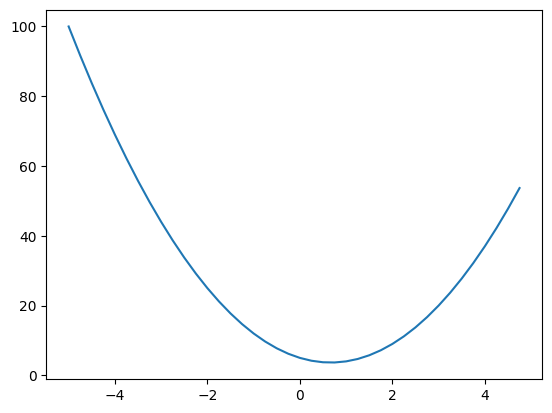

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)

plt.plot(xs, ys)

In [5]:
h = 0.00000001
x = 2/3

# numerical appr of slope -> conv towards right answer
(f(x + h) - f(x))/h

0.0

In [6]:
a = 2.0
b = -3.0
c = 10.0
d = a*b + c

print(d)

4.0


In [10]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
# increase a tiny bit
a += h
d2 = a*b + c

print('d1', d1)
print('d2', d2)
# derivative of d1 wrt a
print('slope', (d2 - d1)/h)


d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [68]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0
        # empty set of empty touple
        self._prev = set(_children)
        self._op = _op
        self.label = label

        
    def __repr__(self):
        # just prints out a nicer expression
        return f"Value(data={self.data})"
        
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / math.exp(2*x + 1)
        out = Value(t, (self,), 'tanh')
        return out



In [22]:
a = Value(2.0)
b = Value(-3.0)
c = Value(10)

In [13]:
a + b

# same as
a.__add__(b)

Value(data=-1.0)

In [14]:
a*b + c

Value(data=4.0)

In [25]:
d = a*b + c

In [16]:
d._prev

{Value(data=-6.0), Value(data=10)}

In [17]:
d._op

'+'

In [30]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [32]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10, label='c')
e = a*b; e.label = 'e'

d = e + c; d.label = 'd'

f =  Value(-2.0, label='f')

L = d*f; L.label = 'L'

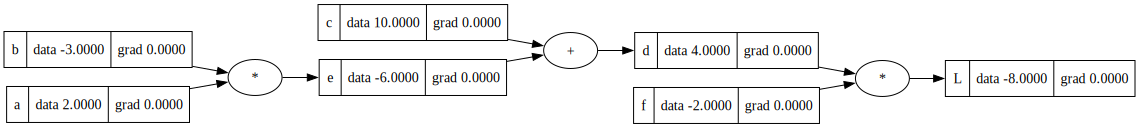

In [34]:
draw_dot(L)

In [49]:
def lol():

    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f =  Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    d.data += h
    f =  Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L2 = L.data

    print((L2 - L1)/h)

lol()

In [43]:
L.grad = 1.0

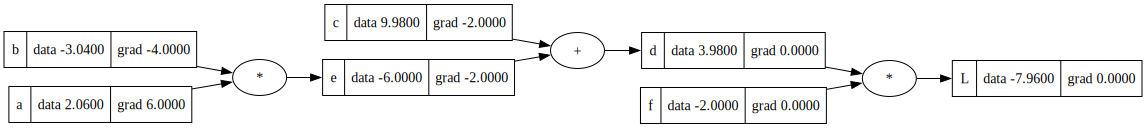

In [57]:
draw_dot(L)

## Proof

L = d*f
dl / dd = ? -> f

(f(x + h) - f(x)) / h

(d+h)*f - d*f / h

(df + hf - df) / h

f

In [45]:
f.grad = 4.0
d.grad = -2.0

dL/dc (and dL/de)

der. of sums: 1.0 obv
d = c + e

dd/dc = 1.0

dd/de = 1.0


## -> Chainrule

dL/dc = dL/dd * dd/dc

dL/de = dL/dd * dd/de


-> plus nodes just route the gradient (local derivatives are just 1)

In [51]:
c.grad = d.grad
e.grad = d.grad

dL/de = -2.0

e = a*b
de / da = b

dL/da = dL/de * de/da

dL/da = -2.0 * -3.0

In [53]:
a.grad = -2.0 * -3.0
b.grad = -2.0 * 2.0

In [58]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

In [59]:
print(L.data)

-6.860800000000001


## build a neuron

y = f(x * w + b)

### tanh activation function

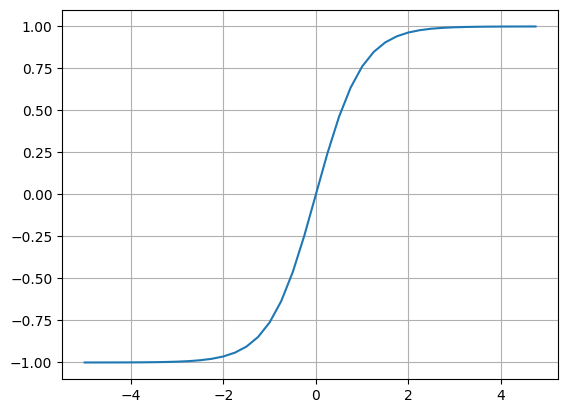

In [63]:
plt.plot(np.arange(-5,5,0.25), np.tanh(np.arange(-5,5,0.25)))
plt.grid()

In [73]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
b = Value(6.7, label='b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1*x2w2; x1w1x2w2.label = 'x1w1x2w2'

n = x1w1x2w2 + b; n.label = 'n'

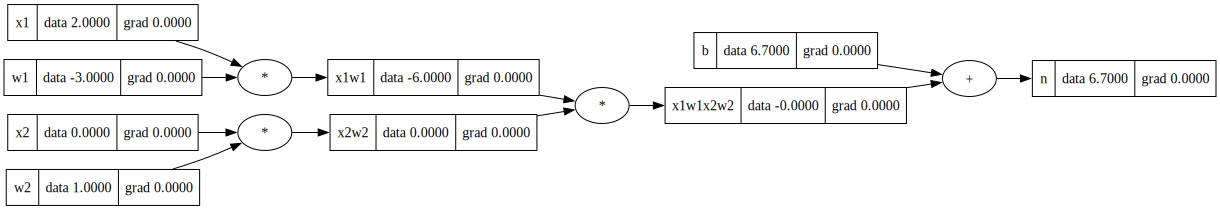

In [74]:
draw_dot(n)

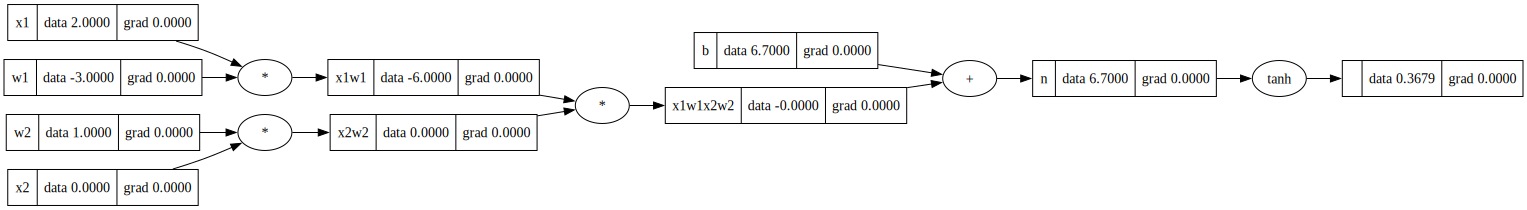

In [75]:
o = n.tanh()

draw_dot(o)